<a href="https://colab.research.google.com/github/Vaishnavi-surisetti/codsoft_tasks/blob/main/CREDIT%20CARD%20FRAUD%20DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import necessary libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

load dataset

In [3]:
data = pd.read_csv('/content/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,8.921900e+04,89219.000000,89219.000000,89219.000000,89219.000000,89219.000000,89219.000000,89219.000000,89219.000000,89219.000000,...,89219.000000,89219.000000,89219.000000,89219.000000,89219.000000,89219.000000,89219.000000,89219.000000,8.921900e+04,89219.000000
mean,-4.077583e-17,-0.265017,-0.039310,0.678741,0.162818,-0.278288,0.094285,-0.109560,0.054700,-0.028905,...,-0.029895,-0.106761,-0.037413,0.009718,0.132571,0.027095,0.001317,0.002412,2.006935e-17,0.002365
std,1.000006e+00,1.873462,1.662189,1.352998,1.359528,1.370156,1.302137,1.230888,1.215542,1.129755,...,0.727551,0.634882,0.625389,0.594412,0.441100,0.496667,0.389659,0.326436,1.000006e+00,0.048574
min,-2.478098e+00,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-9.390980,-9.617915,-3.691181e-01,0.000000
25%,-4.710855e-01,-1.028785,-0.603276,0.182846,-0.719040,-0.897379,-0.646344,-0.601124,-0.139872,-0.692643,...,-0.223859,-0.526395,-0.177767,-0.322006,-0.131948,-0.325915,-0.063273,-0.005744,-3.403663e-01,0.000000
50%,1.436538e-01,-0.262228,0.071695,0.760389,0.185850,-0.313066,-0.156192,-0.070829,0.071465,-0.102804,...,-0.057810,-0.082239,-0.049619,0.064928,0.171090,-0.070776,0.009396,0.023123,-2.680092e-01,0.000000
75%,7.836641e-01,1.152737,0.727352,1.386560,1.037571,0.254273,0.489005,0.416677,0.355078,0.589973,...,0.118714,0.309107,0.081203,0.406088,0.420191,0.306496,0.082733,0.076409,-3.215083e-02,0.000000
max,1.420492e+00,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,18.946734,4.014444,5.525093,3.517346,12.152401,33.847808,7.326743e+01,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89219 entries, 0 to 89218
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    89219 non-null  float64
 1   V1      89219 non-null  float64
 2   V2      89219 non-null  float64
 3   V3      89219 non-null  float64
 4   V4      89219 non-null  float64
 5   V5      89219 non-null  float64
 6   V6      89219 non-null  float64
 7   V7      89219 non-null  float64
 8   V8      89219 non-null  float64
 9   V9      89219 non-null  float64
 10  V10     89219 non-null  float64
 11  V11     89219 non-null  float64
 12  V12     89219 non-null  float64
 13  V13     89219 non-null  float64
 14  V14     89219 non-null  float64
 15  V15     89219 non-null  float64
 16  V16     89219 non-null  float64
 17  V17     89219 non-null  float64
 18  V18     89219 non-null  float64
 19  V19     89219 non-null  float64
 20  V20     89219 non-null  float64
 21  V21     89219 non-null  float64
 22  V22

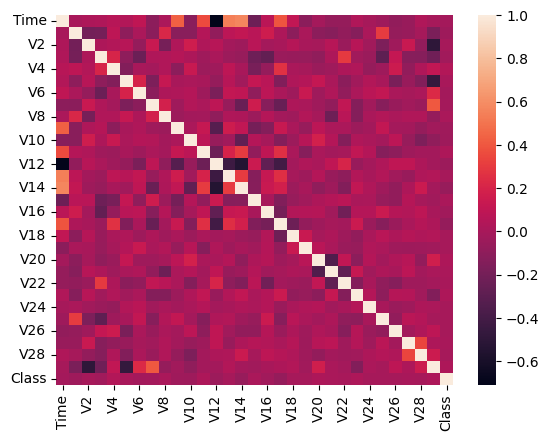

In [8]:
cor=data.corr()
sns.heatmap(cor,annot=False)
plt.show()

In [ ]:
# Drop rows with NaN values in the target variable 'Class'
data.dropna(subset=['Class'], inplace=True)

data processing

In [ ]:
# Assuming 'Amount' and 'Time' are numerical features to be normalized
scaler = StandardScaler()
data[['Amount', 'Time']] = scaler.fit_transform(data[['Amount', 'Time']])

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = data.drop('Class', axis=1)
y = data['Class']

In [ ]:
# Determine if oversampling or undersampling is required
class_counts = y.value_counts()
if class_counts[0] > class_counts[1]:
    print("Class imbalance detected. Using undersampling.")
    sampler = RandomUnderSampler(random_state=42)
else:
    print("Class imbalance detected. Using oversampling.")
    sampler = SMOTE(random_state=42)

Class imbalance detected. Using undersampling.


In [ ]:
# Resample the dataset to handle class imbalance
X_resampled, y_resampled = sampler.fit_resample(X, y)

split dataset into train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

logistic regression model

In [ ]:
# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

model evalution

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96        46
         1.0       0.97      0.92      0.95        39

    accuracy                           0.95        85
   macro avg       0.96      0.95      0.95        85
weighted avg       0.95      0.95      0.95        85

Confusion Matrix:
[[45  1]
 [ 3 36]]
Accuracy: 0.9529411764705882


In [ ]:
from google.colab import drive
drive.mount('/content/drive')